In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
ds1 = pd.read_csv(r'C:\Users\amits\OneDrive\Desktop\DataScience\end to end data sets\UCI_Credit_Card.csv')
ds1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Dropping unwanted columns
ds1 = ds1.drop(columns='ID')

In [4]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [5]:
# Checking Null Values
ds1.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']:
    ds1[col] = ds1[col].astype('category')

In [7]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
P

Univariate analysis

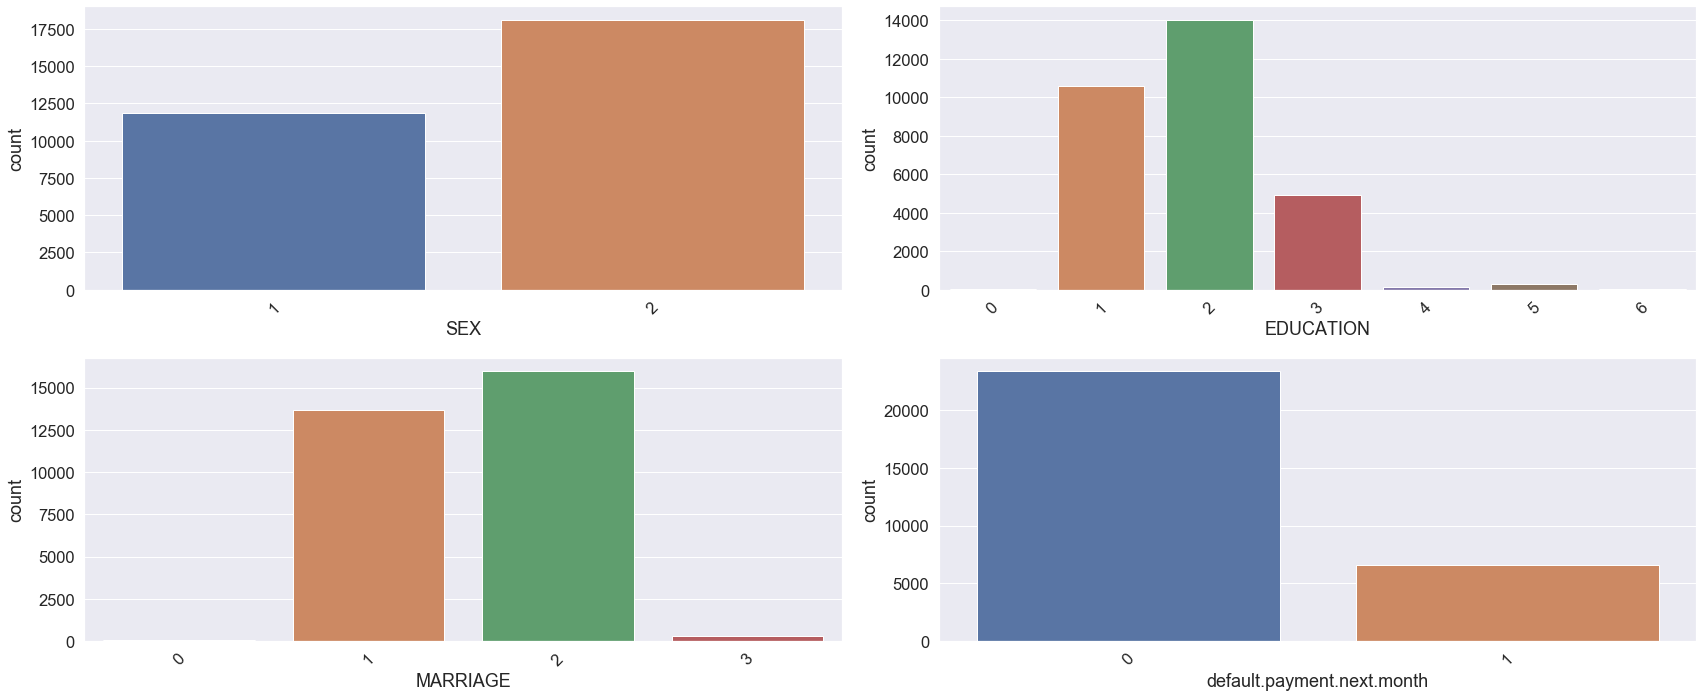

In [8]:
sns.set(rc={'figure.figsize':(24,24)}, font_scale=1.5)
#fig = plt.figure(figsize=(19, 15))
i = 1
for column in ds1.select_dtypes("category"):
    if column != "y":
        plt.subplot(5,2,i)
        sns.countplot(ds1[column])
        i = i + 1
        plt.xticks(rotation=45)       
plt.tight_layout()
plt.show()

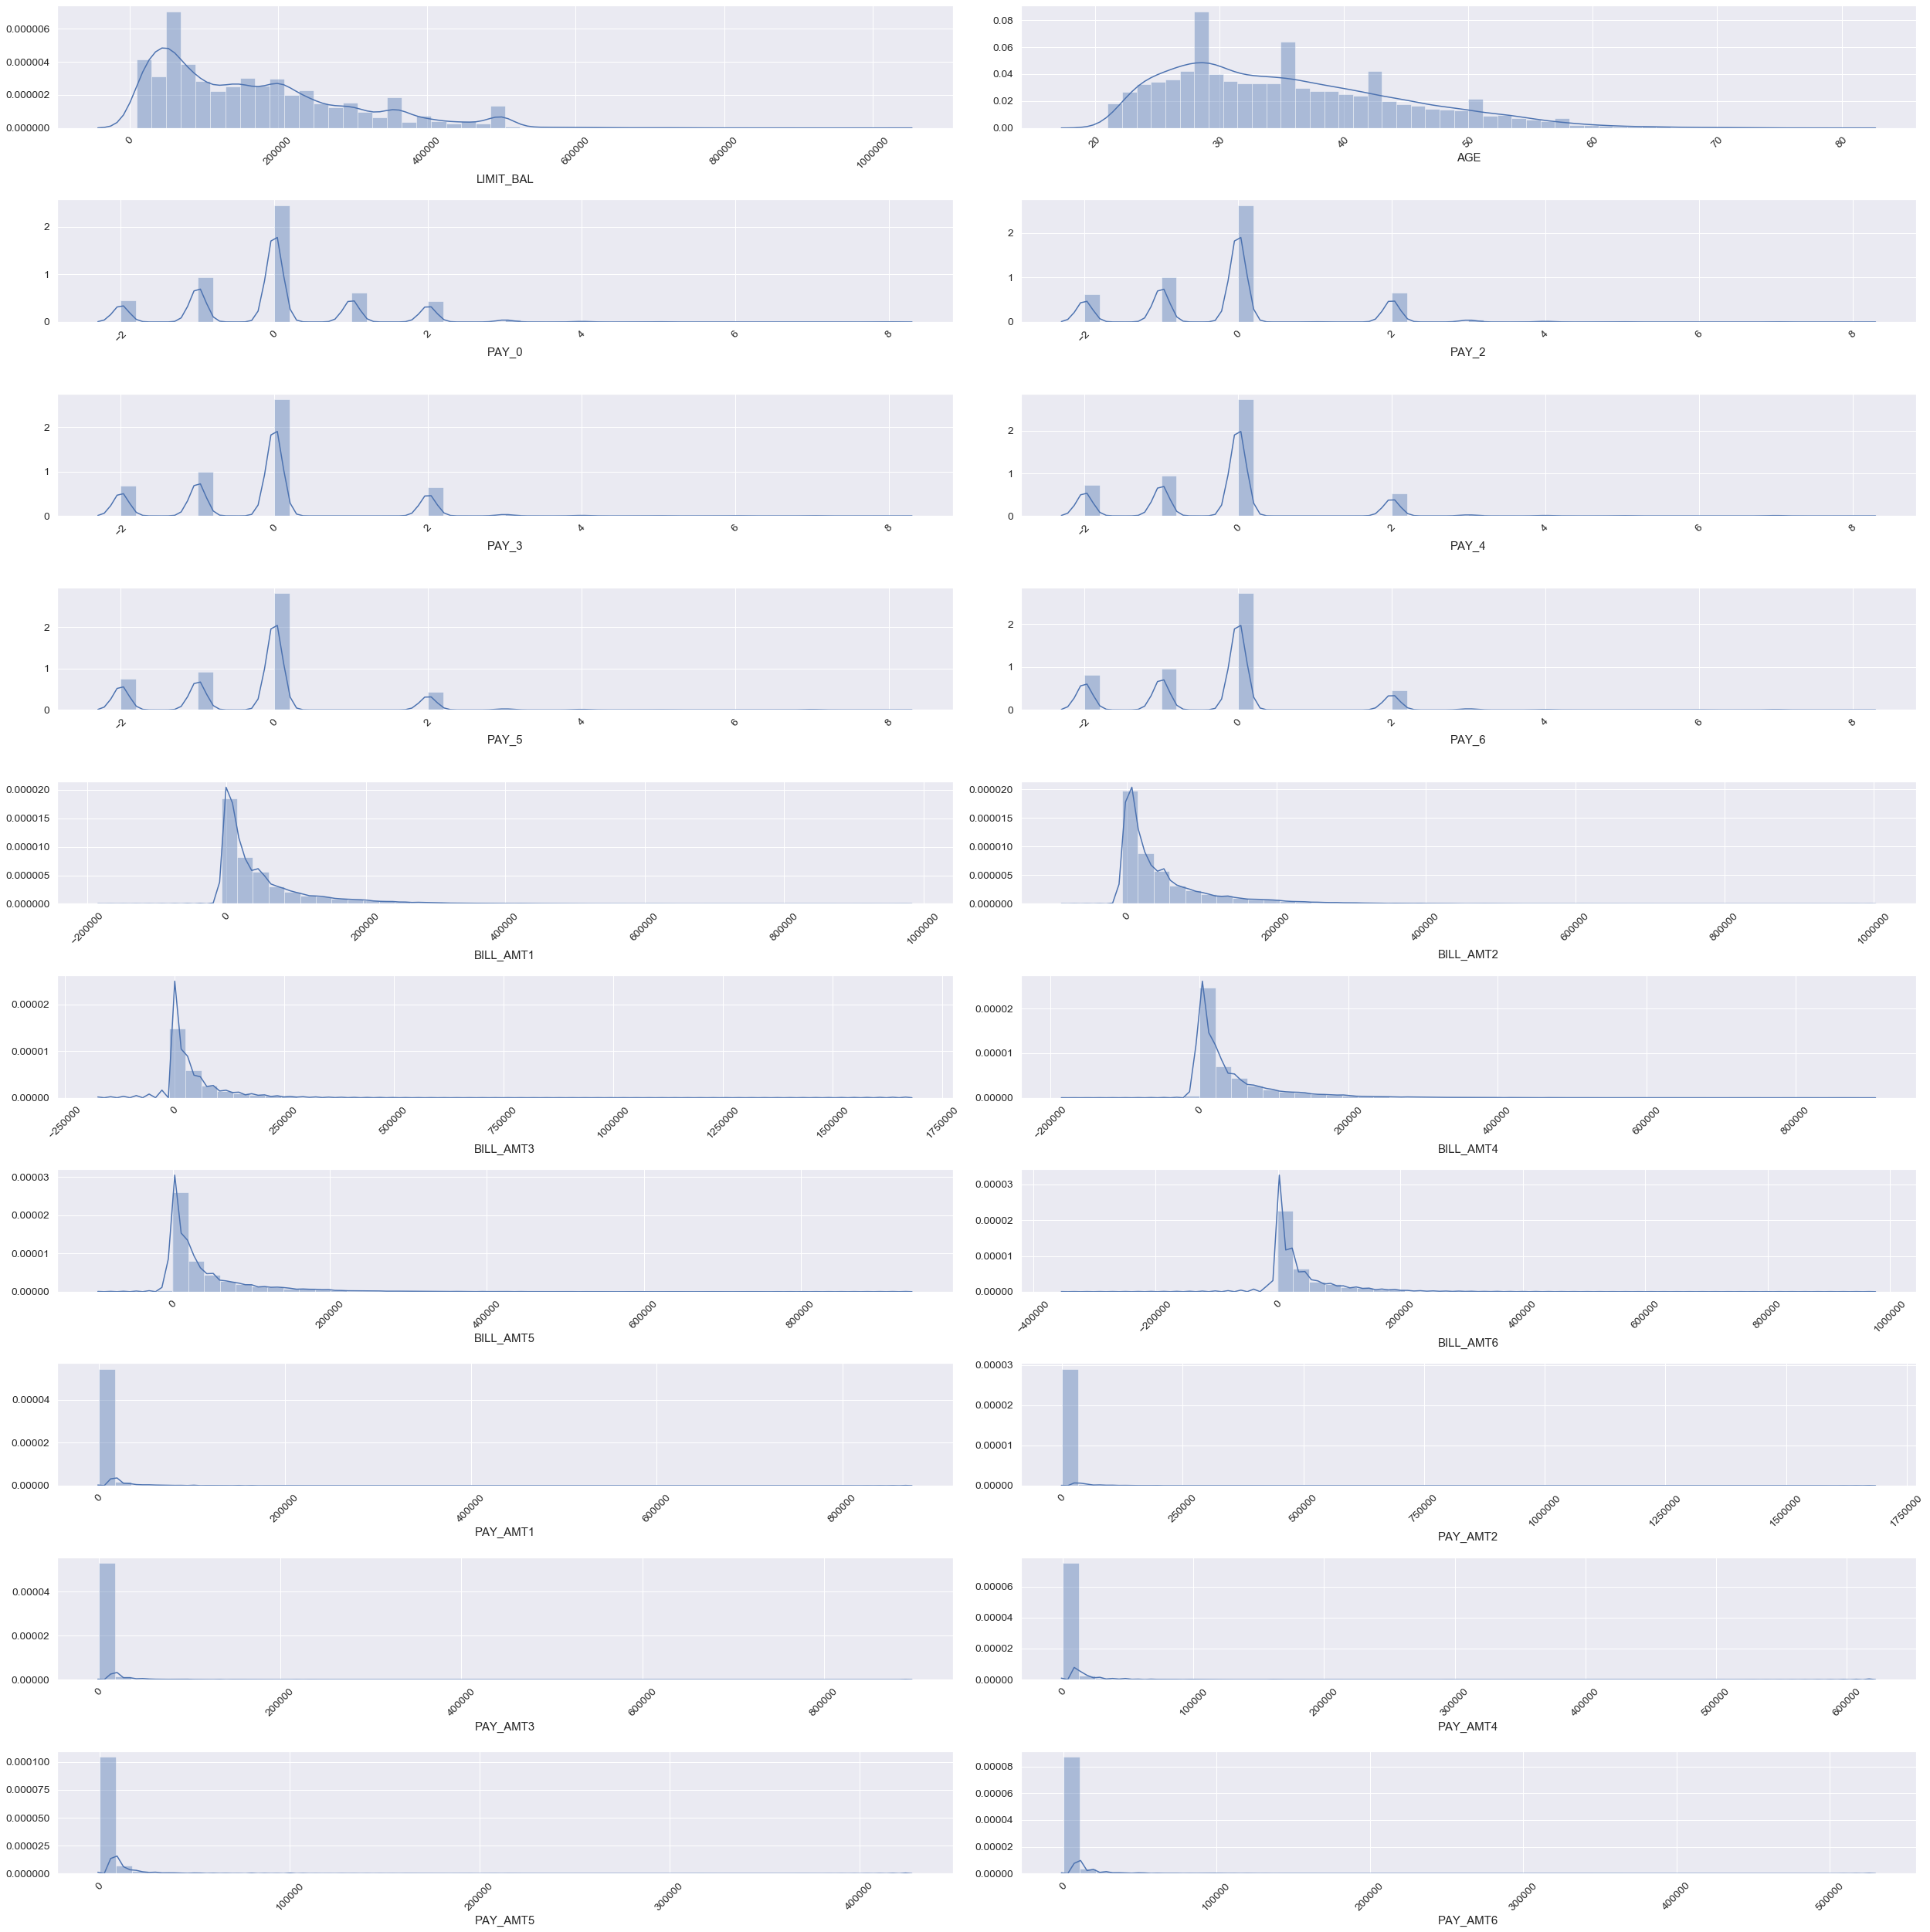

In [9]:
sns.set(rc={'figure.figsize':(35,35)}, font_scale=1.25)
i = 1
for column in ds1.select_dtypes(["int64","float64"]):
    plt.subplot(10,2,i)
    sns.distplot(ds1[column])
    i = i + 1
    plt.xticks(rotation=45)       
plt.tight_layout()
plt.show()

Bivariate analysis

In [10]:
ds1.rename(columns={'default.payment.next.month':'Default'} ,inplace=True)

In [11]:
ds1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


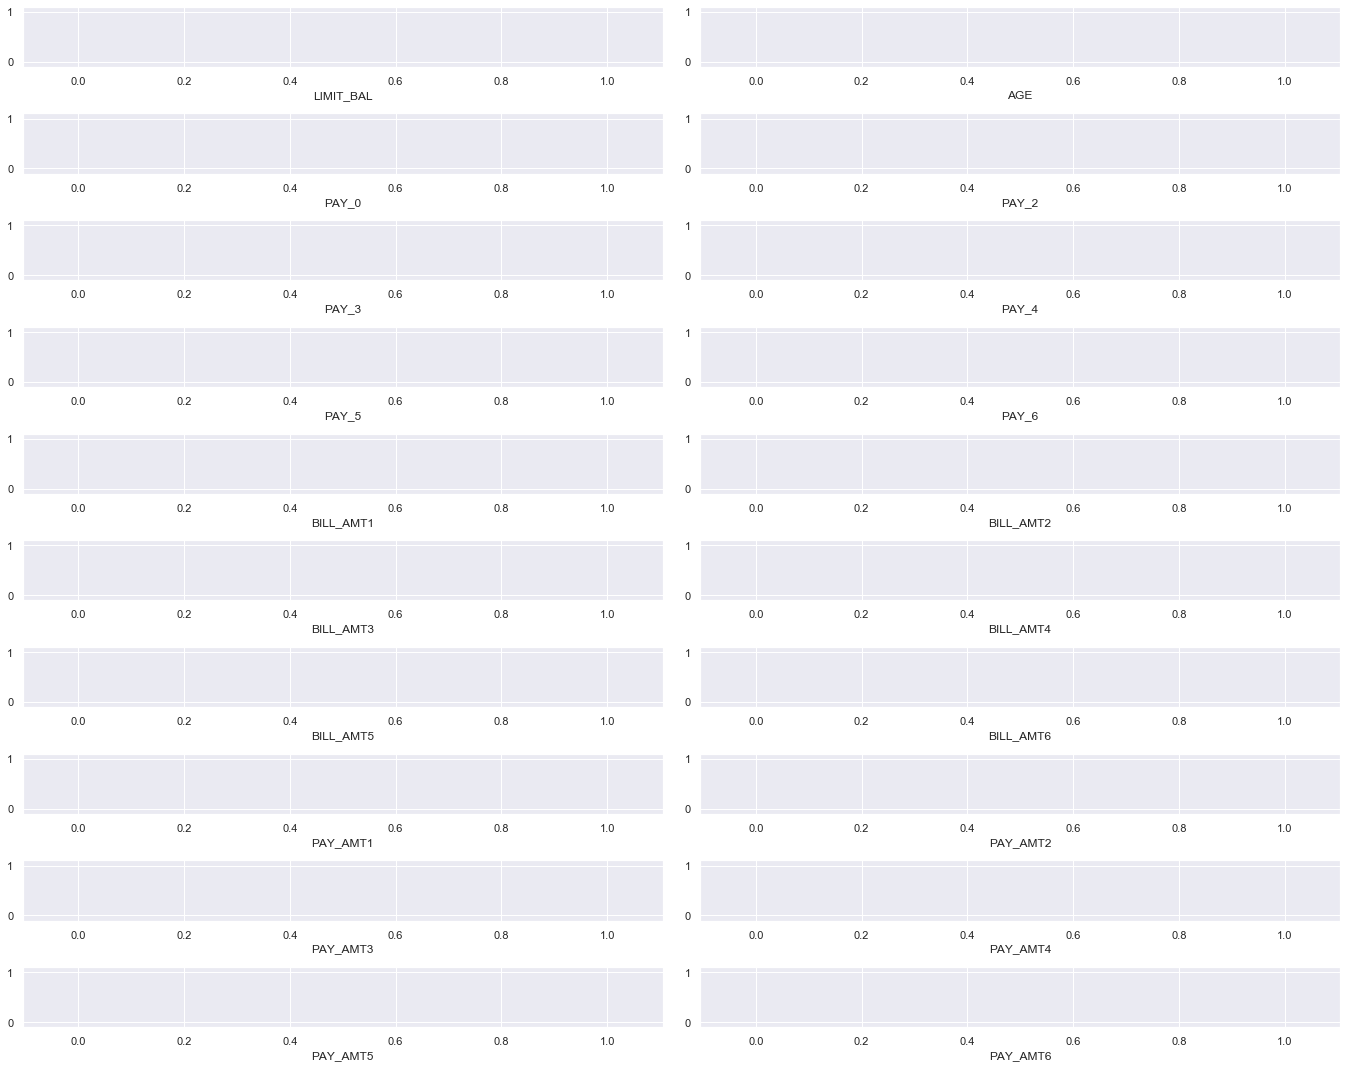

In [12]:
sns.set()
fig = plt.figure(figsize=(19,15))
i=1
for column in ds1.select_dtypes(["int64","float64"]):
    plt.subplot(10,2,i)
    sns.distplot(ds1.loc[ds1.Default=='1',column],hist=False,kde=True,kde_kws={'shade': True, 'linewidth':3},label='yes')
    sns.distplot(ds1.loc[ds1.Default=='0',column],hist=False,kde=True,kde_kws={'shade': True, 'linewidth':3},label='no')
    i=i+1
plt.tight_layout()
plt.show()

In [13]:
ds1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
def bivariate_cat(data,col1,col2,rot):
    if col2=='Default':
        cross_tab = pd.crosstab(ds1[col1], ds1[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
        cross_tab.plot.bar(figsize=(12,5))
        plt.xlabel('{}'.format(col1))
        plt.ylabel('Credit Card Default'.format(col1))
        plt.title('{} Vs Default'.format(col1))
        plt.xticks(rotation=rot)
        plt.show()
        return cross_tab

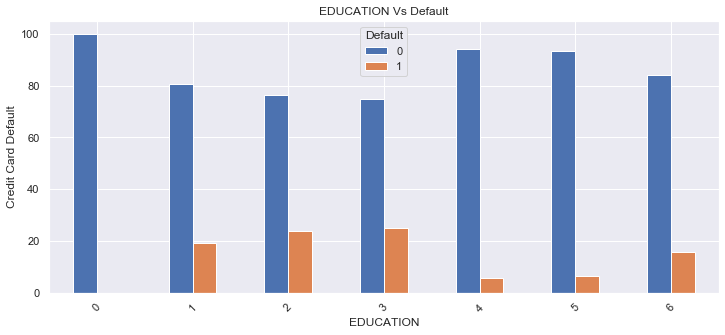

Default,0,1
EDUCATION,,
0,100.00,0.00
1,80.77,19.23
2,76.27,23.73
3,74.84,25.16
4,94.31,5.69
5,93.57,6.43
6,84.31,15.69


In [15]:
bivariate_cat(ds1, 'EDUCATION','Default',45)

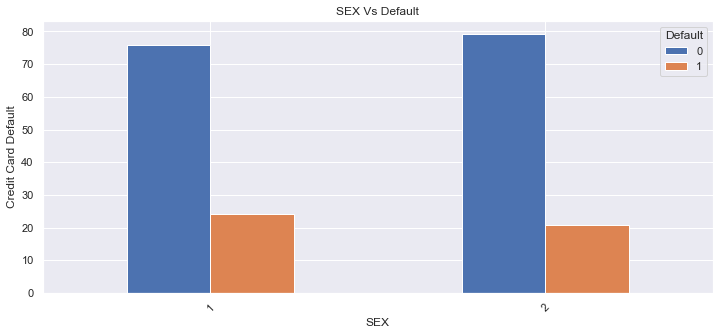

Default,0,1
SEX,,
1,75.83,24.17
2,79.22,20.78


In [16]:
bivariate_cat(ds1, 'SEX','Default',45)

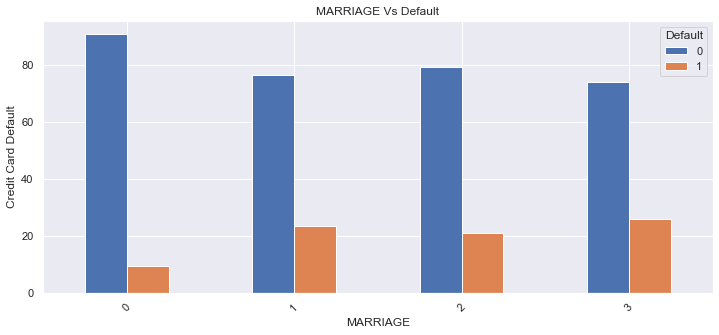

Default,0,1
MARRIAGE,,
0,90.74,9.26
1,76.53,23.47
2,79.07,20.93
3,73.99,26.01


In [17]:
bivariate_cat(ds1, 'MARRIAGE','Default',45)

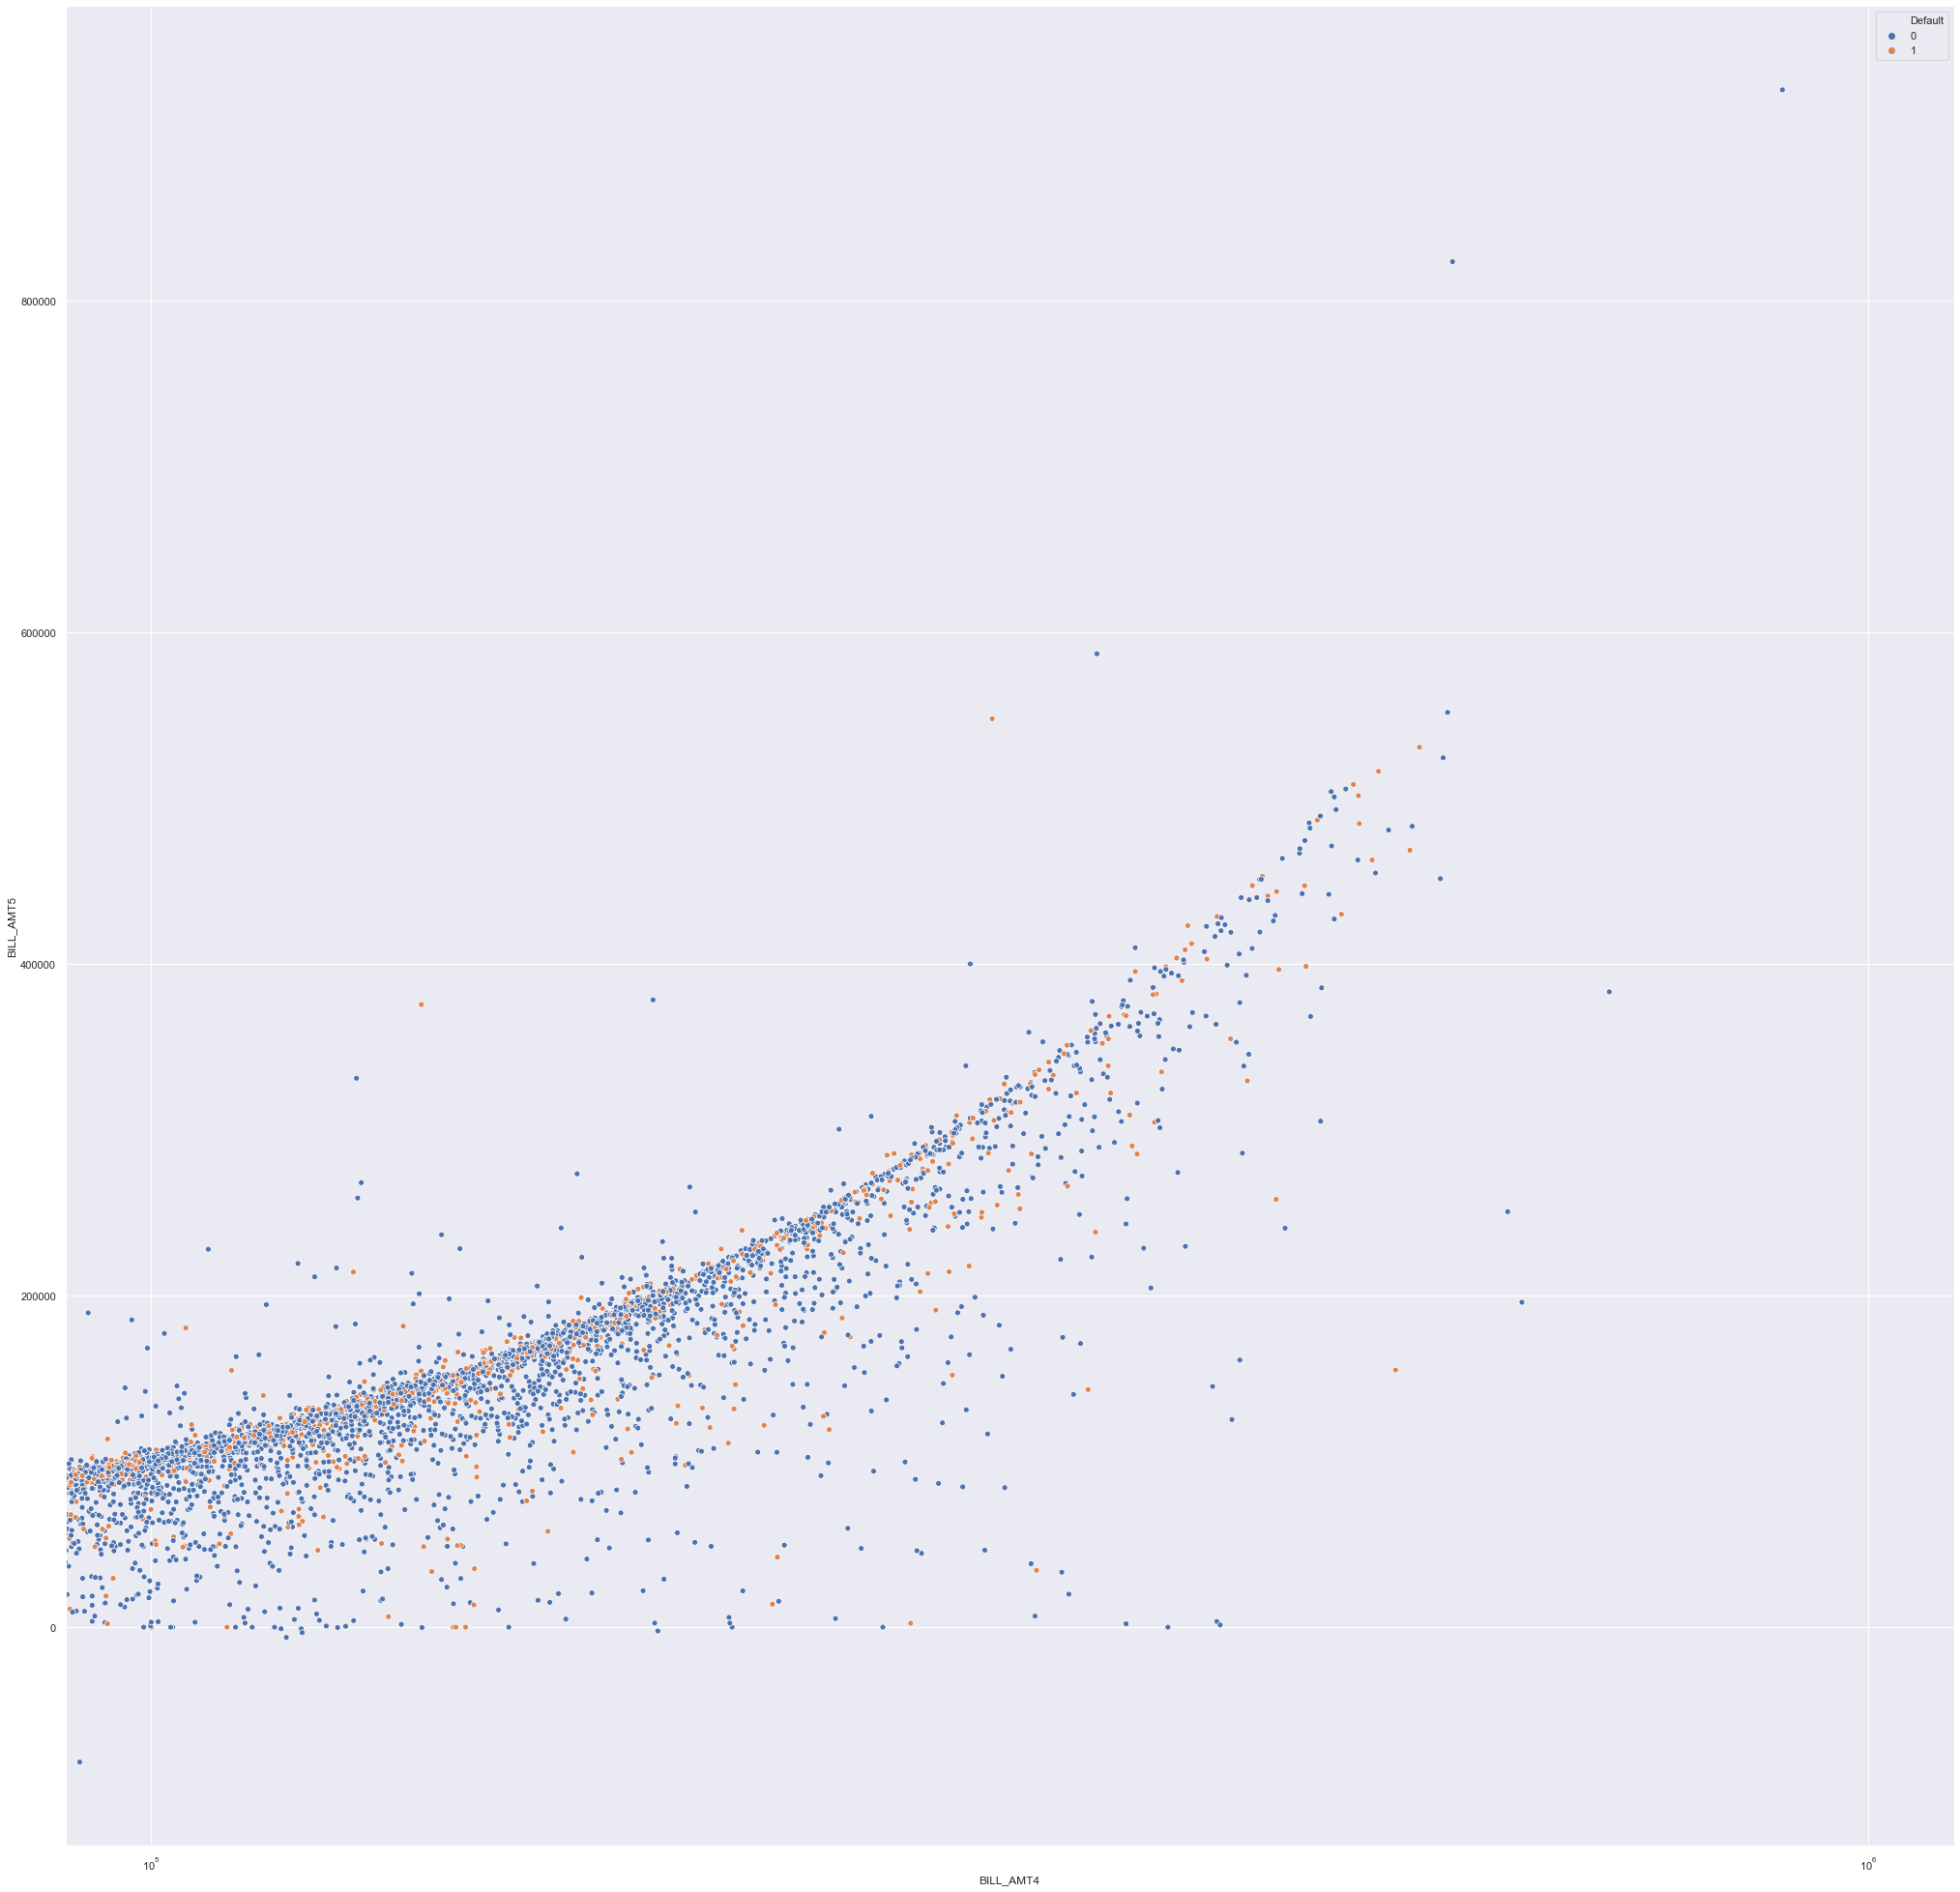

In [18]:
# Contineous vs Contineous
# BILL_AMT4 vs BILL_AMT5
stplot = sns.scatterplot(x="BILL_AMT4", y="BILL_AMT5", hue="Default", data=ds1);
stplot.set(xscale="log");

Normalizing features

In [19]:
cont_features = []
for features in ds1.select_dtypes(include=['int64','float64']):
    cont_features.append(features)

In [20]:
data = ds1
# Scaling Numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data[cont_features] = minmax.fit_transform(data[cont_features].values)

In [21]:
from sklearn.preprocessing import LabelEncoder

# target column
target = ['Default']

# Categorical cols
category_names = ds1.nunique()[ds1.nunique() < 20].keys().tolist()
category_names = [x for x in category_names if x not in target]

# Numerical cols
num_cols = [i for i in ds1.columns if i not in category_names + target]

# Binary cols
bin_cols = ds1.nunique()[ds1.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    ds1[i] = le.fit_transform(ds1[i])
    
# Duplicating cols for multi-value columns
ds1 = pd.get_dummies(data=ds1, columns=multi_cols)

In [22]:
ds1.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_0.0', 'PAY_0_0.1', 'PAY_0_0.2',
       'PAY_0_0.30000000000000004', 'PAY_0_0.4', 'PAY_0_0.5',
       'PAY_0_0.6000000000000001', 'PAY_0_0.7', 'PAY_0_0.8',
       'PAY_0_0.9000000000000001', 'PAY_0_1.0', 'PAY_2_0.0', 'PAY_2_0.1',
       'PAY_2_0.2', 'PAY_2_0.30000000000000004', 'PAY_2_0.4', 'PAY_2_0.5',
       'PAY_2_0.6000000000000001', 'PAY_2_0.7', 'PAY_2_0.8',
       'PAY_2_0.9000000000000001', 'PAY_2_1.0', 'PAY_3_0.0', 'PAY_3_0.1',
       'PAY_3_0.2', 'PAY_3_0.30000000000000004', 'PAY_3_0.4', 'PAY_3_0.5',
       'PAY_3_0.6000000000000001', 'PAY_3_0.7', 'PAY_3_0.8',
       'PAY_3_0.90000000000

Model Building

In [23]:
cols = [i for i in ds1.columns if i not in ds1['Default']]
x = ds1[cols]
y = pd.DataFrame(ds1['Default'])

In [24]:
from sklearn.model_selection import KFold

In [25]:
# Create K-Folds
folds = KFold(n_splits=5, shuffle=True, random_state=0)

In [26]:
for train_index, test_index in folds.split(x,y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [28]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
predicted = model.predict(x_test)

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix :", conf_matrix)

Confusion Matrix : [[4648    0]
 [   0 1352]]


In [32]:
# Classification Report
cf_repo = classification_report(y_test, predicted)
print(cf_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4648
           1       1.00      1.00      1.00      1352

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [33]:
# Accuracy Score
from sklearn import metrics
print("Accuracy Score of Decision Tree Classifier : ",metrics.accuracy_score(y_test, predicted))

Accuracy Score of Decision Tree Classifier :  1.0


In [34]:
# Hyperparameter Meeting
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [35]:
# Define the parameter values that should be searched
sample_split_range = range(10,50,100)
param_grid = dict(min_samples_split=sample_split_range)

# Instantiate the grid
grid_dtc = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

In [36]:
# Fitting the model on hyper-tuning
grid_dtc.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(10, 50, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [42]:
# Prediction
grid_pred = grid_dtc.predict(x_test)

In [43]:
# Predicting Probabilities
grid_prob = grid_dtc.predict_proba(x_test)

In [44]:
# Confusion Matrix
grid_conf_matrix = confusion_matrix(y_test, grid_pred)
print("Confusion Matrix :", grid_conf_matrix)

Confusion Matrix : [[4648    0]
 [   0 1352]]


In [45]:
# Classification Report
grid_cf_repo = metrics.classification_report(y_test, grid_pred)
print(grid_cf_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4648
           1       1.00      1.00      1.00      1352

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [46]:
# Accuracy Score
print("Accuracy Score of Decision Tree Classifier on Hyper-tuning : ",metrics.accuracy_score(y_test, grid_pred))

Accuracy Score of Decision Tree Classifier on Hyper-tuning :  1.0
